In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('cyberbullying_tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
# total labels
df.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

In [4]:
# initital shape
df.shape

(47692, 2)

In [5]:
# no Na or null
df.isna().sum(), df.isnull().sum()

(tweet_text            0
 cyberbullying_type    0
 dtype: int64,
 tweet_text            0
 cyberbullying_type    0
 dtype: int64)

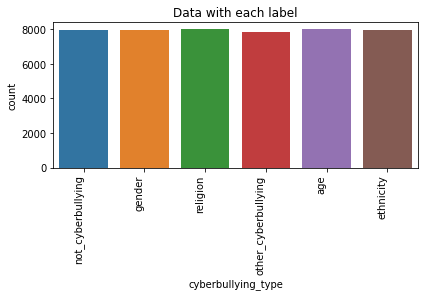

In [6]:
import seaborn as sns
from matplotlib import pyplot as plt
# data
countplot = sns.countplot(df.cyberbullying_type)
countplot.set_xticklabels(countplot.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.title('Data with each label')
plt.show()

In [7]:
# check for duplicates
print(df.duplicated().sum())

36


In [8]:
# drop duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.groupby(df.cyberbullying_type).describe().T

cyberbullying_type                                                age  \
tweet_text count                                                 7992   
           unique                                                7992   
           top      To all you bitches that bullied me in jr. high...   
           freq                                                     1   

cyberbullying_type                                          ethnicity  \
tweet_text count                                                 7959   
           unique                                                7959   
           top      Girl FUCK YOU ! RT @tayyoung_: FUCK OBAMA, dum...   
           freq                                                     1   

cyberbullying_type                                             gender  \
tweet_text count                                                 7948   
           unique                                                7948   
           top      If this horrendousness beats Lynn and Tony the...   
           freq                                                     1   

cyberbullying_type                                  not_cyberbullying  \
tweet_text count                                                 7937   
           unique                                                7937   
           top      If this horrendousness beats Lynn and Tony the...   
           freq                                                     1   

cyberbullying_type                                other_cyberbullying  \
tweet_text count                                                 7823   
           unique                                                7823   
           top      @Coley_Cee: Let me make a couple tweets off cu...   
           freq                                                     1   

cyberbullying_type                        religion  
tweet_text count                              7997  
           unique                             7997  
           top      You think Im muslim you idiot?  
           freq                                  1

## Text Preprocessing

In [10]:
# dataset before preprocessing
df.head(5)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [11]:
from utils import Preprocess

process = Preprocess()
df['tweet_text'] = df['tweet_text'].apply(process.removeStopwords)
df['tweet_text'] = df['tweet_text'].apply(process.stem)
df['tweet_text'] = df['tweet_text'].apply(process.removeHttps)
df['cyberbullying_type'] = df['cyberbullying_type'].apply(process.markLabels)

In [12]:
# after preprocessing
df.head(5)

,tweet_text,cyberbullying_type
0,"word #katandandre, food crapilicious!",0
1,#aussietv white? #theblock #imacelebrityau #to...,0
2,@xochitlsuckkk classi whore? red velvet cupcakes?,0
3,"@jason_gio meh. :p thank head up, concern angr...",0
4,@rudhoeenglish isi account pretend kurdish acc...,0


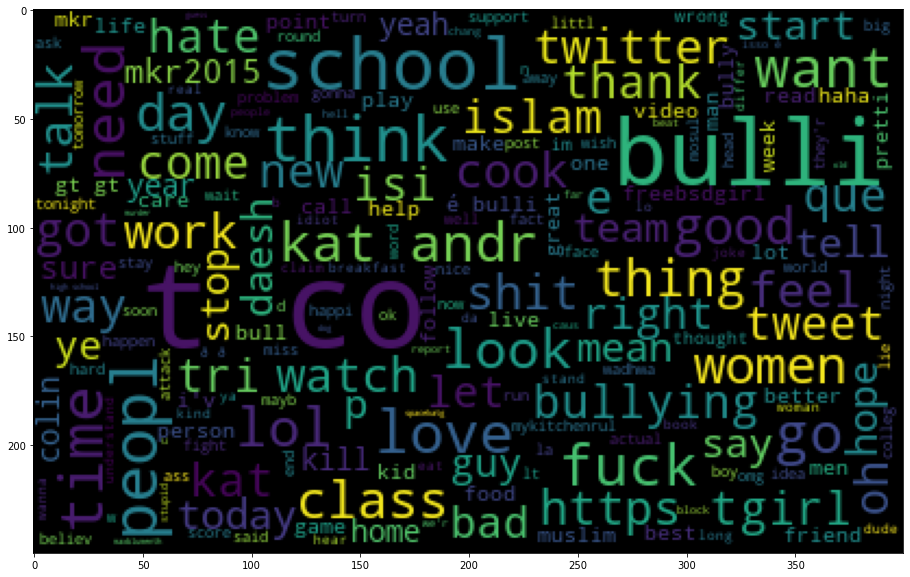

In [13]:
from utils import GeneratePlots
from utils import label

plot = GeneratePlots()
sentence = plot.generateWordCloud('not_cyberbullying', df)

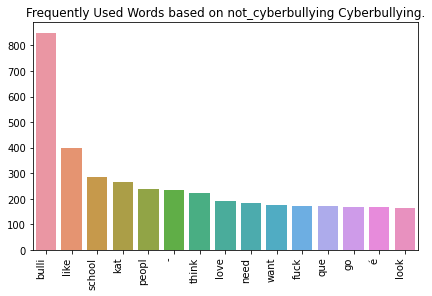

In [14]:
# most frequent words with not cyberbullying type
plot.freqPlotter(sentence, 'not_cyberbullying')

In [15]:
print(label)

{'not_cyberbullying': 0, 'gender': 1, 'religion': 2, 'age': 3, 'ethnicity': 4, 'other_cyberbullying': 5}


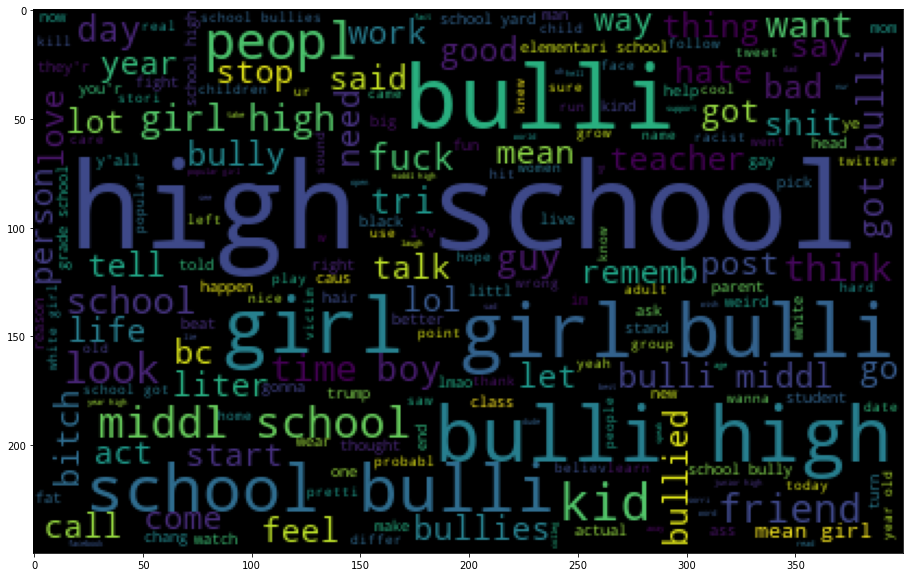

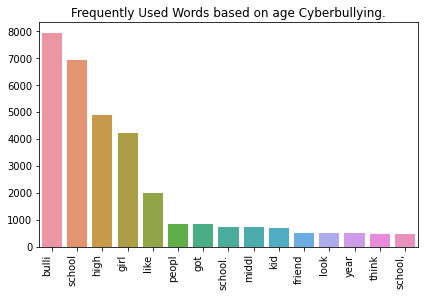

In [16]:
# cyberbullying based on age word cloud
sentence = plot.generateWordCloud('age', df)
plot.freqPlotter(sentence, 'age')

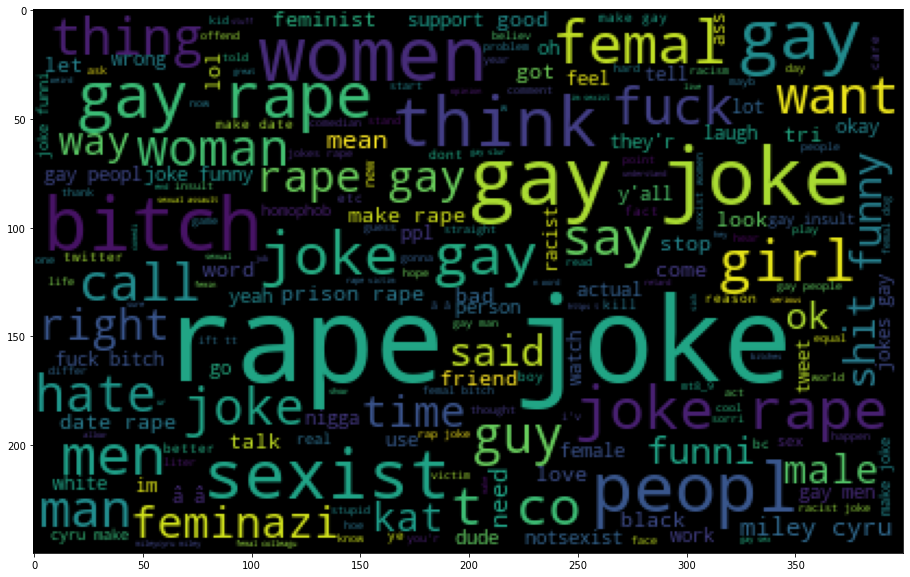

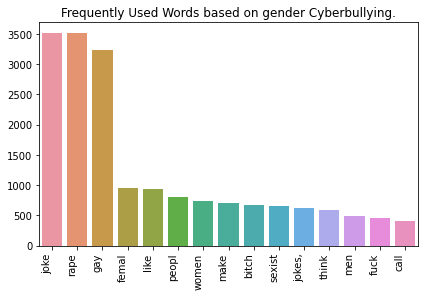

In [17]:
# cyber bulling based on gender
sentence = plot.generateWordCloud('gender', df)
plot.freqPlotter(sentence, 'gender')

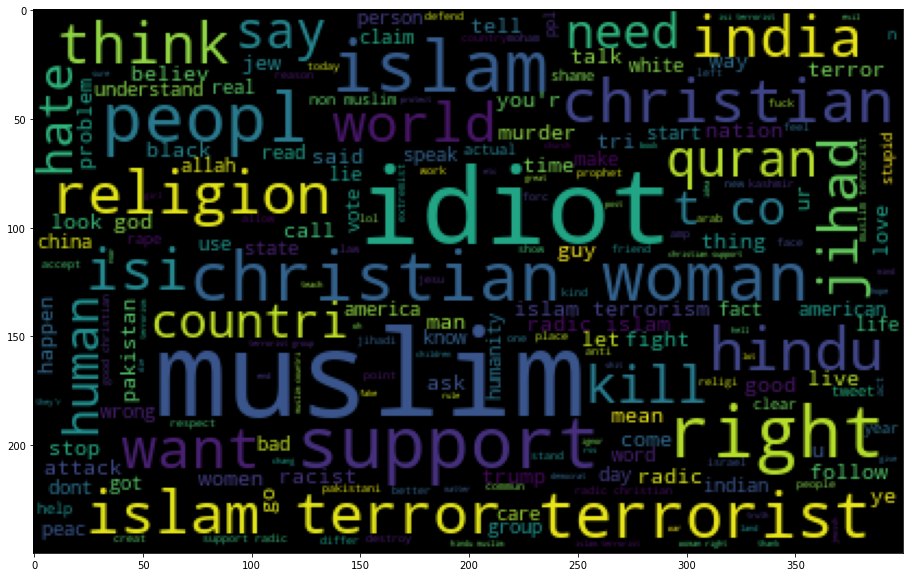

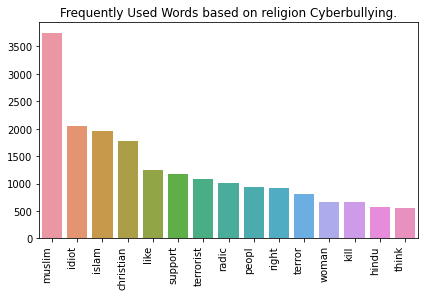

In [18]:
# cyberbulling based on religion
sentence = plot.generateWordCloud('religion', df)
plot.freqPlotter(sentence, 'religion')

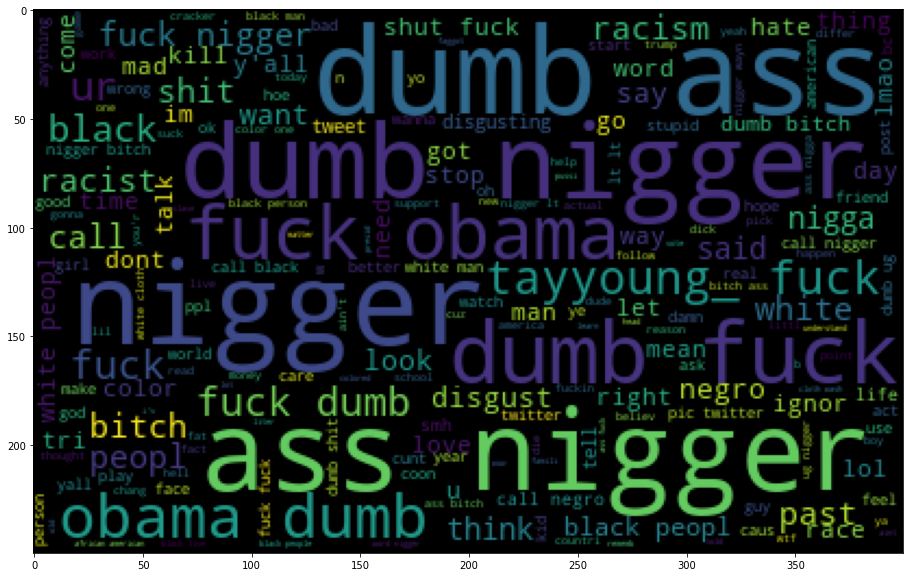

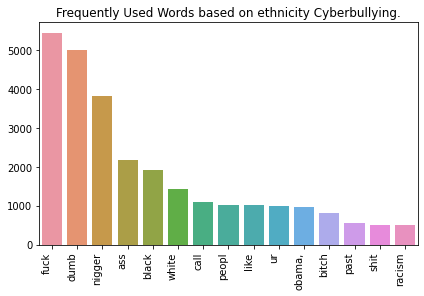

In [19]:
# cyberbulling based on ethnicity
sentence = plot.generateWordCloud('ethnicity', df)
plot.freqPlotter(sentence, 'ethnicity')

### Split Dataset

In [20]:
X = df.tweet_text
y = df.cyberbullying_type

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1000)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38124,), (9532,), (38124,), (9532,))

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train)

CountVectorizer()

In [ ]:
# vocabulary
print("length of vocabulary %d" % len(vectorizer.vocabulary_))
print(vectorizer.vocabulary_)

In [24]:
x_train = vectorizer.transform(x_train)
x_test = vectorizer.transform(x_test)

In [25]:
x_train, y_train, x_test, y_test

(<38124x49033 sparse matrix of type '<class 'numpy.int64'>'
 	with 462979 stored elements in Compressed Sparse Row format>,
 11450    1
 27754    5
 14509    1
 4371     0
 7977     1
         ..
 18815    2
 3777     0
 6219     0
 4698     0
 42453    4
 Name: cyberbullying_type, Length: 38124, dtype: int64,
 <9532x49033 sparse matrix of type '<class 'numpy.int64'>'
 	with 109440 stored elements in Compressed Sparse Row format>,
 30739    5
 12144    1
 43285    4
 37248    3
 1907     0
         ..
 8268     1
 16450    2
 5739     0
 6613     0
 22842    2
 Name: cyberbullying_type, Length: 9532, dtype: int64)

In [26]:
# check vector created using Bow technique
x_train[0].toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score
model_0 = MultinomialNB()
model_0.fit(x_train, y_train)
y_predicted = model_0.predict(x_test)
accuracy = accuracy_score(y_test, y_pred=y_predicted)
precision = precision_score(y_test, y_pred=y_predicted, average='weighted')
accuracy, precision

(0.7695132186319765, 0.7629572423272066)

### Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

tree_model_0 = DecisionTreeClassifier(criterion='gini', random_state=555)
tree_model_0.fit(x_train, y_train)
tree_pred = tree_model_0.predict(x_test)
tree_acc = accuracy_score(y_test, y_pred=tree_pred)
tree_prec = precision_score(y_test, y_pred=tree_pred, average='weighted')
tree_acc, tree_prec

(0.7925933697020562, 0.7939290690566446)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
lg_0 = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, penalty='l2')
lg_0.fit(x_train, y_train)
lg_pred = lg_0.predict(x_test)
lg_acc = accuracy_score(y_test, y_pred=lg_pred)
lg_prec = precision_score(y_test, y_pred=lg_pred, average='weighted')
lg_acc, lg_prec

(0.8188208140998741, 0.8232378347957439)

In [30]:
def getClass(value):
    for k in label:
        if label[k] == value:
            return k
def PredictSentenceVEC(sentence, model):
    sentence = sentence.lower()
    tweet = np.array([sentence])
    tweet = vectorizer.transform(tweet)
    result = model.predict(tweet)
    try:
        prediction = result.item()
    except:
        prediction = np.argmax(result)
    print(f'sentence = "{sentence}", predicted value = {getClass(prediction)}')
def PredictSentenceTF(sentence, model):
    sentence = sentence.lower()
    tweet = np.array([sentence])
    tweet = tf.transform(tweet)
    result = model.predict(tweet)
    try:
        prediction = result.item()
    except:
        prediction = np.argmax(result)
    print(f'sentence = "{sentence}", predicted value = {getClass(prediction)}')

### Testing

In [31]:
sent = "Hello how are you doing"
PredictSentenceVEC(sent, lg_0)

sentence = "hello how are you doing", predicted value = not_cyberbullying


In [32]:
sent = "You small child black guy"
PredictSentenceVEC(sent, tree_model_0)

sentence = "you small child black guy", predicted value = ethnicity


### Model Comparison

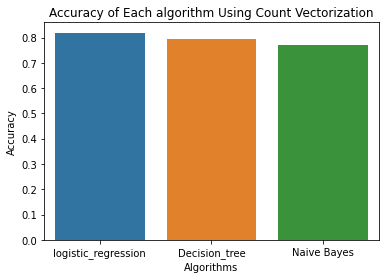

In [33]:
y_ = [lg_acc, tree_acc, accuracy];
x_ = ['logistic_regression', 'Decision_tree', 'Naive Bayes']
sns.barplot(x = x_, y = y_)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each algorithm Using Count Vectorization')
plt.show()

## Tfidf

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((35742,), (11914,), (35742,), (11914,))

In [35]:
tf.fit(x_train.astype('U'))
x_train = tf.transform(x_train.astype('U'))
x_test = tf.transform(x_test.astype('U'))

In [36]:
x_train.toarray().shape

(35742, 47185)

### Naive bayes

In [37]:
# naive bayes
model = MultinomialNB()
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred=y_predicted)
precision = precision_score(y_test, y_pred=y_predicted, average='weighted')
accuracy, precision

(0.747104247104247, 0.7385891029573528)

### Decision Tree

In [38]:
# decision tree
tree_model = DecisionTreeClassifier(criterion='gini', random_state=100)
tree_model.fit(x_train, y_train)
tree_pred = tree_model.predict(x_test)
tree_acc = accuracy_score(y_test, y_pred=tree_pred)
tree_prec = precision_score(y_test, y_pred=tree_pred, average='weighted')
tree_acc, tree_prec

(0.7910861171730736, 0.7951023460798817)

### Logistic Regression

In [39]:
# logistic regression model
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, penalty='l2')
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
lg_acc = accuracy_score(y_test, y_pred=lg_pred)
lg_prec = precision_score(y_test, y_pred=lg_pred, average='weighted')
lg_acc, lg_prec

(0.8217223434614739, 0.8240730509538615)

## Comparison

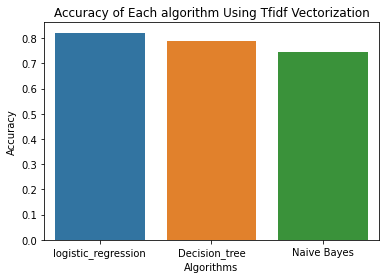

In [40]:
y_ = [lg_acc, tree_acc, accuracy];
x_ = ['logistic_regression', 'Decision_tree', 'Naive Bayes']
sns.barplot(x = x_, y = y_)
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Each algorithm Using Tfidf Vectorization')
plt.show()

In [57]:
sentence = input("Enter Sentence that you want to classify\n")
model_name = {
    1 : lg,
    2 : tree_model,
    3 : model
}
model_no = int(input('Enter between 1 and 3 including 1,3\n'))
PredictSentenceTF(sentence, model_name[model_no])

Enter Sentence that you want to classify
what a famous art
Enter between 1 and 3 including 1,3
1
sentence = "what a famous art", predicted value = not_cyberbullying
